In [468]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [469]:
df = pd.read_csv('hw5_treasury yield curve data.csv')

In [470]:
df=df.dropna()

In [488]:
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [472]:
#df.describe()

In [473]:
datX = df[df.columns[1:31]]

In [474]:
#datX

In [475]:
datX = pd.concat([datX], axis=1)
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#sc.fit(datX)
#datX_std = sc.transform(datX)

In [476]:
from pandas import DataFrame
#dataX = DataFrame.from_records(datX_std)
#not scaler at this point 
dataX = datX

In [477]:
datanumy = df[df.columns[31]]

In [478]:
#datanumy

In [479]:
dataXy= pd.concat([dataX, datanumy],axis=1)
#dataXy

In [480]:
cols = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05','SVENF06','SVENF07','SVENF08','SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','SVENF17','SVENF18','SVENF19','SVENF20','SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']

In [481]:
col30 = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05','SVENF06','SVENF07','SVENF08','SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','SVENF17','SVENF18','SVENF19','SVENF20','SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30']

In [482]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)

cm30 = np.corrcoef(df[col30].values.T)
 

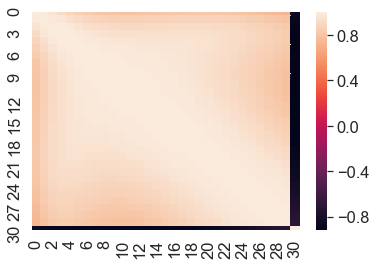

In [483]:
heat_map = sns.heatmap(cm)
plt.show()

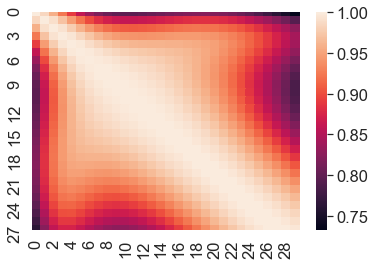

In [487]:
heat_map = sns.heatmap(cm30)
#plt.axis('equal')

plt.show()


In [489]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [490]:
X = dataXy.iloc[:, 0:30].values


In [491]:
X.shape

(8071, 30)

In [492]:
y = dataXy['Adj_Close'].values

In [493]:
#Split data into training and test sets.  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [494]:
#2.pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

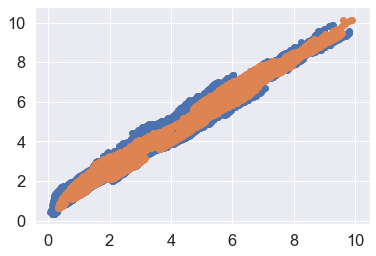

0.9863786944334032


In [495]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# bond
bond0 = X_train[:,0]
bond1 = X_train[:,1]
bond2 = X_train[:,2]

# yield
ye = y_train

# Scatter plot from each treasury, here we only see first 3 correlation
plt.scatter(bond0, bond1)
plt.scatter(bond1, bond2)
#plt.scatter(bond2, ye)
#plt.axis('')
plt.show()


# Calculate the Pearson correlation
correlation, pvalue = pearsonr(bond0, bond1)

# Display the correlation
print(correlation)

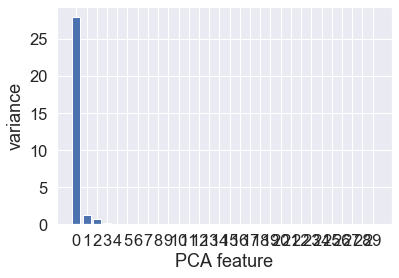

In [496]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
#del range
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'X_train_std'
pipeline.fit(X_train_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

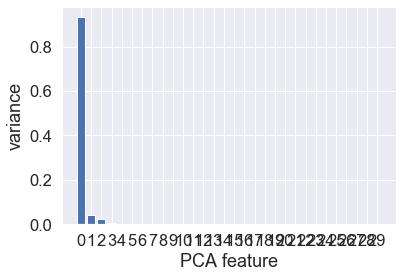

In [497]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [438]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 3 components: pca
pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
sc.fit(X_train)
X_train_std = sc.transform(X_train_std)
X_test_std = sc.transform(X_test_std)

pca.fit(X_train_std)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_train_std)
#pca_features_ = pca.transform(X_test_std)
# Print the shape of pca_features
print(pca_features.shape)


(6860, 3)


In [439]:
print(pca.explained_variance_)

[7.5547234  0.3523426  0.11600388]


In [440]:
pca.explained_variance_ratio_

array([0.93688387, 0.04369506, 0.01438599])

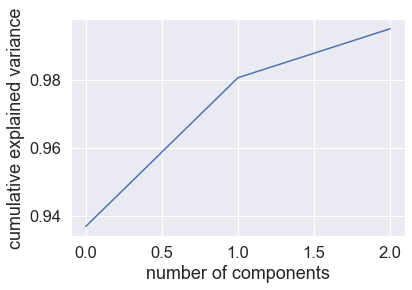

In [441]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [442]:
#3.///////
from sklearn.metrics import mean_squared_error
from math import sqrt
#rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [443]:
from sklearn.linear_model import LogisticRegression

In [444]:
lr = LogisticRegression()

In [445]:
#modify y type
import numpy as np

y_trainn = np.round(y_train)
y_testn = np.round(y_test)

In [564]:
#a)Logistic regression classifier  with original dataset
LR = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='ovr').fit(X_train_std, y_trainn)
#solver='lbfgs', multi_class='ovr'
y_train_pred = LR.predict(X_train_std)
y_test_pred = LR.predict(X_test_std)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_trainn, y_train_pred),
        mean_squared_error(y_testn, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_trainn, y_train_pred),
        r2_score(y_testn, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_trainn, y_train_pred)),
       sqrt(mean_squared_error(y_testn, y_test_pred))))
round(LR.score(X_test_std,y_testn), 5)

MSE train: 0.194, test: 0.187
R^2 train: 0.969, test: 0.971
RMSE train: 0.440, test: 0.432


0.85384

In [566]:
sklearn.metrics.accuracy_score(y_trainn, y_train_pred, normalize=True, sample_weight=None)


0.8507288629737609

In [567]:
sklearn.metrics.accuracy_score(y_testn, y_test_pred, normalize=True, sample_weight=None)

0.8538398018166804

In [448]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [573]:
#Logistic regression classifier  with pca dataset
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#multi_class='multinomial'
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr' ).fit(X_train_pca, y_trainn)

y_train_pred1 = LR.predict(X_train_pca)
y_test_pred1 = LR.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_trainn, y_train_pred1),
        mean_squared_error(y_testn, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_trainn, y_train_pred1),
        r2_score(y_testn, y_test_pred1)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_trainn, y_train_pred1)),
sqrt(mean_squared_error(y_testn, y_test_pred1))))
round(LR.score(X_test_pca,y_testn), 5)

MSE train: 0.194, test: 0.187
R^2 train: 0.969, test: 0.971
RMSE train: 0.440, test: 0.433


0.85301

In [574]:
sklearn.metrics.accuracy_score(y_trainn, y_train_pred1, normalize=True, sample_weight=None)

0.8507288629737609

In [575]:
sklearn.metrics.accuracy_score(y_testn, y_test_pred1, normalize=True, sample_weight=None)

0.8530140379851362

In [523]:
from sklearn import svm

In [576]:
#SVM regressor model with original dataset
SVM = svm.SVC(kernel="linear").fit(X_train, y_trainn)
SVM.predict(X_test)
round(SVM.score(X_test, y_testn), 4)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_trainn, y_train_pred),
        mean_squared_error(y_testn, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_trainn, y_train_pred),
        r2_score(y_testn, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_trainn, y_train_pred)),
       sqrt(mean_squared_error(y_testn, y_test_pred))))
round(SVM.score(X_test, y_testn), 4)

MSE train: 0.056, test: 0.053
R^2 train: 0.991, test: 0.992
RMSE train: 0.236, test: 0.230


0.9472

In [577]:
sklearn.metrics.accuracy_score(y_trainn, y_train_pred, normalize=True, sample_weight=None)

0.9441690962099125

In [578]:
sklearn.metrics.accuracy_score(y_testn, y_test_pred, normalize=True, sample_weight=None)

0.9471511147811725

In [579]:
#SVM regressor model with pca dataset
SVM = svm.SVC(kernel="linear").fit(X_train_pca, y_trainn)
SVM.predict(X_test_pca)

y_train_pred = SVM.predict(X_train_pca)
y_test_pred = SVM.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_trainn, y_train_pred),
        mean_squared_error(y_testn, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_trainn, y_train_pred),
        r2_score(y_testn, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_trainn, y_train_pred)),
       sqrt(mean_squared_error(y_testn, y_test_pred))))
round(SVM.score(X_test_pca, y_testn), 4)

MSE train: 0.066, test: 0.082
R^2 train: 0.989, test: 0.987
RMSE train: 0.257, test: 0.286


0.9315

In [580]:
sklearn.metrics.accuracy_score(y_trainn, y_train_pred, normalize=True, sample_weight=None)



0.9338192419825073

In [581]:
sklearn.metrics.accuracy_score(y_testn, y_test_pred, normalize=True, sample_weight=None)

0.9314616019818331

In [ ]:
print("My name is {Xuehui Chao}")
print("My NetID is: {xuehuic2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

